# Important Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

encoded_airline_survey = pd.read_csv('encoded_airline_survey.csv')
encoded_airline_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Age                                103904 non-null  int64
 1   Flight Distance                    103904 non-null  int64
 2   Inflight wifi service              103904 non-null  int64
 3   Departure/Arrival time convenient  103904 non-null  int64
 4   Ease of Online booking             103904 non-null  int64
 5   Gate location                      103904 non-null  int64
 6   Food and drink                     103904 non-null  int64
 7   Online boarding                    103904 non-null  int64
 8   Seat comfort                       103904 non-null  int64
 9   Inflight entertainment             103904 non-null  int64
 10  On-board service                   103904 non-null  int64
 11  Leg room service                   103904 non-null  int64
 12  Ba

# Seperating Features and Target Variables

In [3]:
# Separate features (X) and target (y)
X = encoded_airline_survey.drop(columns=["satisfaction_Encoded"])
y = encoded_airline_survey["satisfaction_Encoded"]

# Check the shapes of X and y
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (103904, 22)
Target shape: (103904,)


# Data Split

In [5]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Check the sizes of the splits
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training features shape: (83123, 22)
Test features shape: (20781, 22)
Training target shape: (83123,)
Test target shape: (20781,)


## K Nearest Neighbour

## Data Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

## Base Model

In [11]:
# Generate predictions for training and test sets
y_train_pred = knn.predict(X_train_std)  # Predictions for the training set
y_test_pred = knn.predict(X_test_std)   # Predictions for the test set

# Metrics for train and test sets
data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred, average="binary"),
        recall_score(y_train, y_train_pred, average="binary"),
        f1_score(y_train, y_train_pred, average="binary")
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, average="binary"),
        recall_score(y_test, y_test_pred, average="binary"),
        f1_score(y_test, y_test_pred, average="binary")
    ]
}

# Create a DataFrame
df_metrics = pd.DataFrame(data)

# Display the table
print(df_metrics)

      Metric     Train      Test
0   Accuracy  0.942735  0.917617
1  Precision  0.964570  0.943562
2     Recall  0.900643  0.863166
3   F1 Score  0.931511  0.901575


## Confusion Matrix

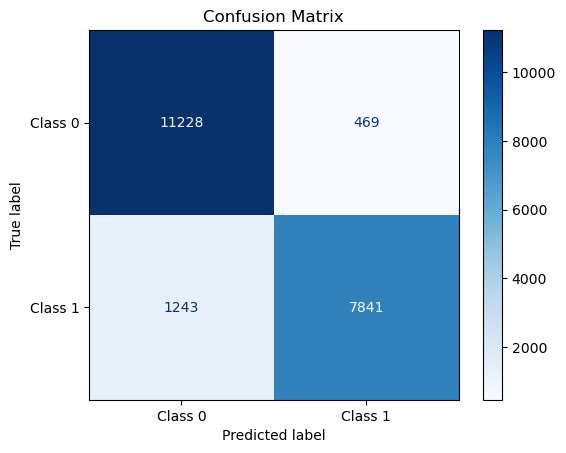

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix for the test dataset
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  # Import KNN model

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 101, 5),  # Search values from 1 to 100 with step 5
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_std, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Best Score: 0.9281306743760267


In [22]:
best_knn = KNeighborsClassifier(
    n_neighbors=16,
    metric='manhattan',
    weights='distance'
)

best_knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=16, weights='distance')

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_train_pred = best_knn.predict(X_train_std)
y_test_pred = best_knn.predict(X_test_std)

# Calculate metrics for Train and Test
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
    ]
}

# Display metrics in tabular format
import pandas as pd
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


      Metric  Train      Test
0   Accuracy    1.0  0.926953
1  Precision    1.0  0.949929
2     Recall    1.0  0.879238
3   F1 Score    1.0  0.913217


## Confusion Matrix

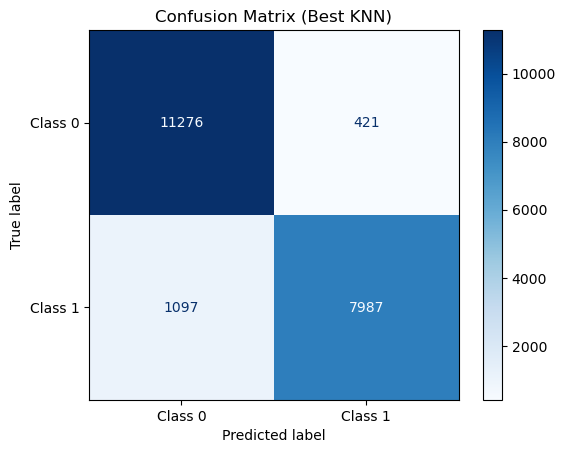

In [26]:
# Generate predictions for the test set using best_knn
y_test_pred_best = best_knn.predict(X_test_std)

# Compute the confusion matrix
cm_best = confusion_matrix(y_test, y_test_pred_best)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Best KNN)")
plt.show()


## Feature Importance

In [28]:
from sklearn.inspection import permutation_importance

# Ensure the KNN classifier is fitted
knn.fit(X_train_std, y_train)

# Compute permutation importance
result = permutation_importance(knn, X_test_std, y_test, scoring='accuracy')

# Display feature importance
for i in result.importances_mean.argsort()[::-1]:  # Sort features by importance
    print(f"Feature: {X.columns[i]}, Importance: {result.importances_mean[i]:.3f}")


Feature: Inflight wifi service, Importance: 0.051
Feature: Type of Travel_Personal Travel, Importance: 0.044
Feature: Customer Type_disloyal Customer, Importance: 0.044
Feature: Online boarding, Importance: 0.013
Feature: Class_Eco, Importance: 0.013
Feature: Ease of Online booking, Importance: 0.009
Feature: Class_Eco Plus, Importance: 0.008
Feature: Seat comfort, Importance: 0.006
Feature: Checkin service, Importance: 0.005
Feature: Baggage handling, Importance: 0.005
Feature: Cleanliness, Importance: 0.005
Feature: Inflight service, Importance: 0.005
Feature: Age, Importance: 0.004
Feature: On-board service, Importance: 0.003
Feature: Departure/Arrival time convenient, Importance: 0.003
Feature: Gate location, Importance: 0.003
Feature: Leg room service, Importance: 0.003
Feature: Inflight entertainment, Importance: 0.002
Feature: Food and drink, Importance: 0.001
Feature: Flight Distance, Importance: 0.001
Feature: Departure Delay in Minutes, Importance: 0.001
Feature: Gender_Male,

## ROC Curve

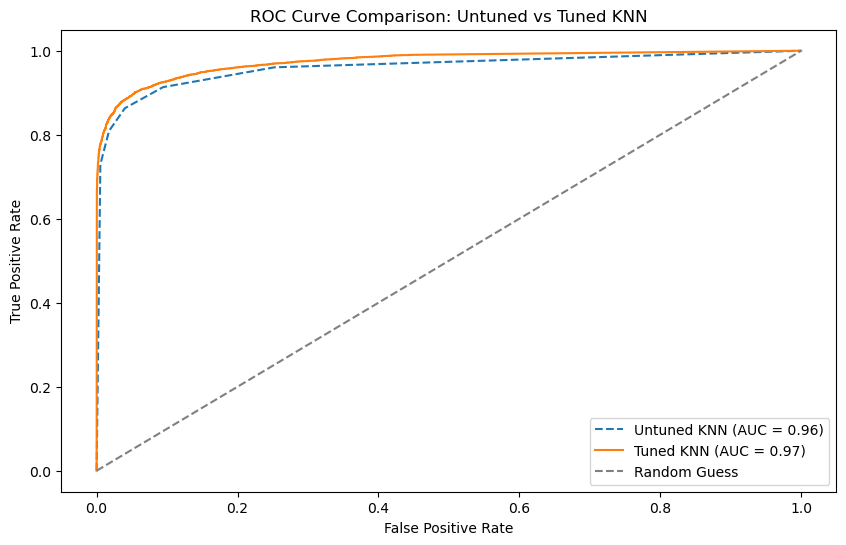

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure both untuned and tuned KNN models are fitted
knn.fit(X_train_std, y_train)  # Fit the untuned KNN model
best_knn.fit(X_train_std, y_train)  # Fit the tuned KNN model

# Get probabilities for the positive class for untuned KNN
untuned_probs = knn.predict_proba(X_test_std)[:, 1]

# Get probabilities for the positive class for tuned KNN
tuned_probs = best_knn.predict_proba(X_test_std)[:, 1]

# Calculate ROC curve and AUC for the untuned model
untuned_fpr, untuned_tpr, _ = roc_curve(y_test, untuned_probs)
untuned_auc = auc(untuned_fpr, untuned_tpr)

# Calculate ROC curve and AUC for the tuned model
tuned_fpr, tuned_tpr, _ = roc_curve(y_test, tuned_probs)
tuned_auc = auc(tuned_fpr, tuned_tpr)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(untuned_fpr, untuned_tpr, label=f"Untuned KNN (AUC = {untuned_auc:.2f})", linestyle="--")
plt.plot(tuned_fpr, tuned_tpr, label=f"Tuned KNN (AUC = {tuned_auc:.2f})", linestyle="-")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Untuned vs Tuned KNN")
plt.legend(loc="lower right")
plt.show()
